In [1]:
import numpy as np
x_train = np.load("/home/jovyan/UNSW/x_train.npy")
y_train = np.load("/home/jovyan/UNSW/y_train.npy")
x_val = np.load("/home/jovyan/UNSW/x_val.npy")
y_val = np.load("/home/jovyan/UNSW/y_val.npy")
x_test = np.load("/home/jovyan/UNSW/x_test.npy")
y_test = np.load("/home/jovyan/UNSW/y_test.npy")

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/UNSW/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/UNSW/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn import svm


best_svm = svm.SVC(C=10, kernel='poly', tol=0.01)
best_svm.fit(x_train, y_train)

dump(best_svm, "/home/jovyan/UNSW/pre_train/SVM.joblib")

model = best_svm

epsilon = 0.01
FPR: [0.12495649 0.08263736]
TPR: [0.91736264 0.87504351]
FNR: [0.08263736 0.12495649]
TNR: [0.87504351 0.91736264]
Accuracy: 0.8885593703661457
Precision(micro,macro,weighted): 0.8885593703661457,0.8662958899979714,0.8992662777623722
F1(micro,macro,weighted: 0.8885593703661457,0.8773277259356034,0.8907365884551723
Recall(micro,macro,weighted: 0.8885593703661457,0.8962030729451544,0.8885593703661457
FPR: 0.10379692705484561
tpr: 0.8962030729451544
fnr: 0.10379692705484561
tnr: 0.8962030729451544


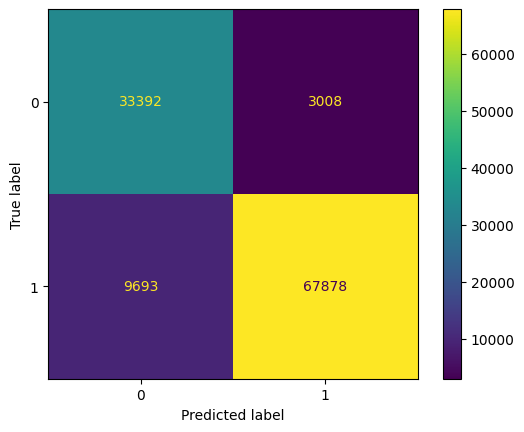

epsilon = 0.1
FPR: [0.33586005 0.15596154]
TPR: [0.84403846 0.66413995]
FNR: [0.15596154 0.33586005]
TNR: [0.66413995 0.84403846]
Accuracy: 0.7215958445569487
Precision(micro,macro,weighted): 0.7215958445569487,0.7209348021422279,0.7858889244726983
F1(micro,macro,weighted: 0.7215958445569487,0.7120082609990239,0.730990247181439
Recall(micro,macro,weighted: 0.7215958445569487,0.7540892053731421,0.7215958445569487
FPR: 0.245910794626858
tpr: 0.7540892053731421
fnr: 0.245910794626858
tnr: 0.7540892053731421


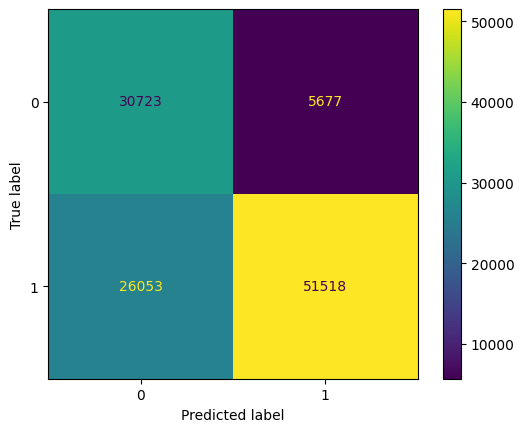

epsilon = 0.2
FPR: [0.53073958 0.2235989 ]
TPR: [0.7764011  0.46926042]
FNR: [0.2235989  0.53073958]
TNR: [0.46926042 0.7764011 ]
Accuracy: 0.5673548534276264
Precision(micro,macro,weighted): 0.5673548534276264,0.6121512909183008,0.6862469129474903
F1(micro,macro,weighted: 0.5673548534276264,0.5651365908211612,0.5763562578691682
Recall(micro,macro,weighted: 0.5673548534276264,0.6228307591938813,0.5673548534276264
FPR: 0.37716924080611863
tpr: 0.6228307591938813
fnr: 0.37716924080611863
tnr: 0.6228307591938813


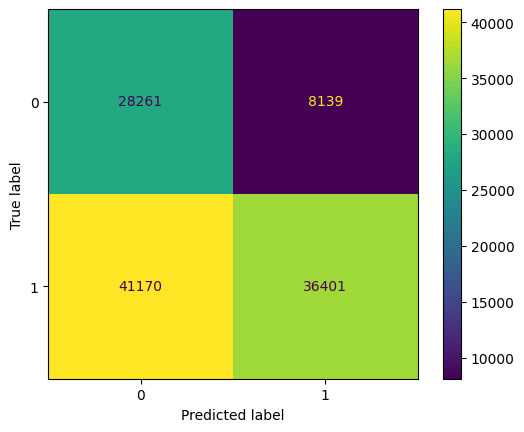

epsilon = 0.3
FPR: [0.69501489 0.39928571]
TPR: [0.60071429 0.30498511]
FNR: [0.39928571 0.69501489]
TNR: [0.30498511 0.60071429]
Accuracy: 0.3994349439769766
Precision(micro,macro,weighted): 0.3994349439769766,0.4539993487307228,0.5137665849591124
F1(micro,macro,weighted: 0.3994349439769766,0.3992864343071658,0.40269842739632905
Recall(micro,macro,weighted: 0.3994349439769766,0.4528496980646302,0.3994349439769766
FPR: 0.5471503019353698
tpr: 0.4528496980646302
fnr: 0.5471503019353698
tnr: 0.4528496980646302


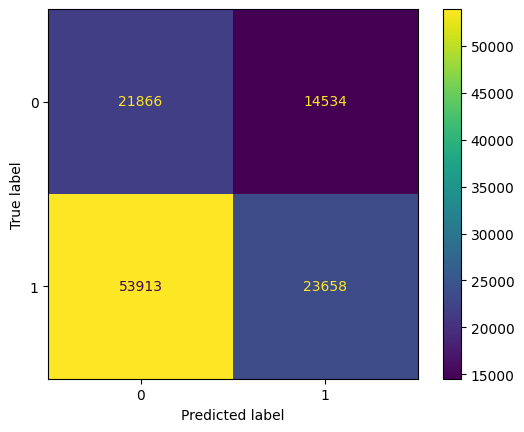

epsilon = 0.01
FPR: [0.12092148 0.08483516]
TPR: [0.91516484 0.87907852]
FNR: [0.08483516 0.12092148]
TNR: [0.87907852 0.91516484]
Accuracy: 0.890603750076774
Precision(micro,macro,weighted): 0.890603750076774,0.8684819934990154,0.9003417493342865
F1(micro,macro,weighted: 0.890603750076774,0.8792993091677881,0.8926430156004226
Recall(micro,macro,weighted: 0.890603750076774,0.8971216783886466,0.890603750076774
FPR: 0.10287832161135328
tpr: 0.8971216783886466
fnr: 0.10287832161135328
tnr: 0.8971216783886466


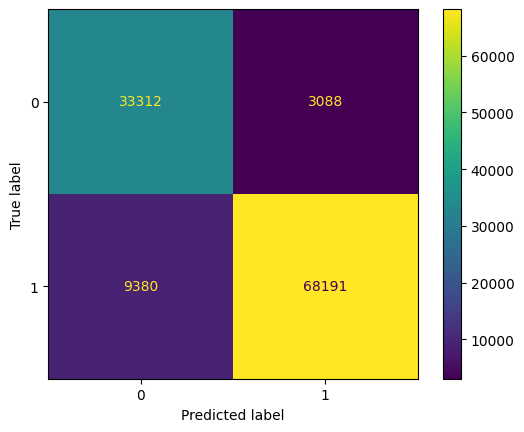

epsilon = 0.1
FPR: [0.24284849 0.17931319]
TPR: [0.82068681 0.75715151]
FNR: [0.17931319 0.24284849]
TNR: [0.75715151 0.82068681]
Accuracy: 0.7774433847206745
Precision(micro,macro,weighted): 0.7774433847206745,0.7566273899700002,0.8084139220794938
F1(micro,macro,weighted: 0.7774433847206745,0.7621949596064304,0.7839480057040932
Recall(micro,macro,weighted: 0.7774433847206745,0.7889191629972172,0.7774433847206745
FPR: 0.21108083700278268
tpr: 0.7889191629972172
fnr: 0.21108083700278268
tnr: 0.7889191629972172


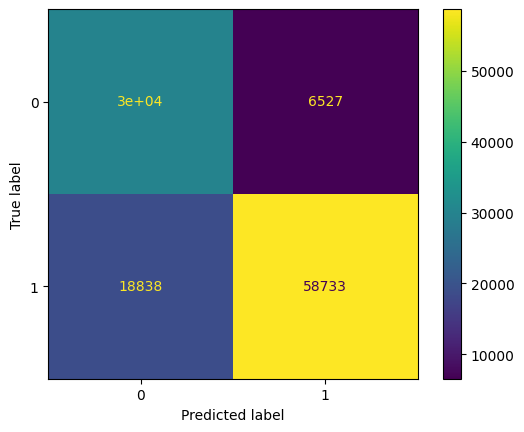

epsilon = 0.2
FPR: [0.42862668 0.29208791]
TPR: [0.70791209 0.57137332]
FNR: [0.29208791 0.42862668]
TNR: [0.57137332 0.70791209]
Accuracy: 0.6149810039395986
Precision(micro,macro,weighted): 0.6149810039395986,0.6215745270122758,0.6883877040797605
F1(micro,macro,weighted: 0.6149810039395986,0.604499256499806,0.6277580699008896
Recall(micro,macro,weighted: 0.6149810039395986,0.639642705208316,0.6149810039395986
FPR: 0.36035729479168394
tpr: 0.639642705208316
fnr: 0.36035729479168394
tnr: 0.639642705208316


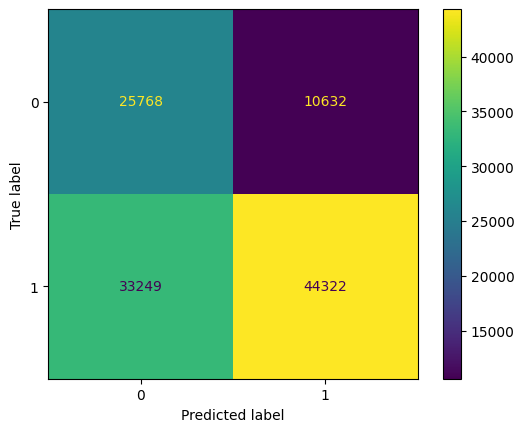

epsilon = 0.3
FPR: [0.45906331 0.52846154]
TPR: [0.47153846 0.54093669]
FNR: [0.52846154 0.45906331]
TNR: [0.54093669 0.47153846]
Accuracy: 0.5187723192742013
Precision(micro,macro,weighted): 0.5187723192742013,0.50545338892104,0.5705553337827287
F1(micro,macro,weighted: 0.5187723192742013,0.4948600216435841,0.5345621310015767
Recall(micro,macro,weighted: 0.5187723192742013,0.5062375758982094,0.5187723192742013
FPR: 0.4937624241017906
tpr: 0.5062375758982094
fnr: 0.4937624241017906
tnr: 0.5062375758982094


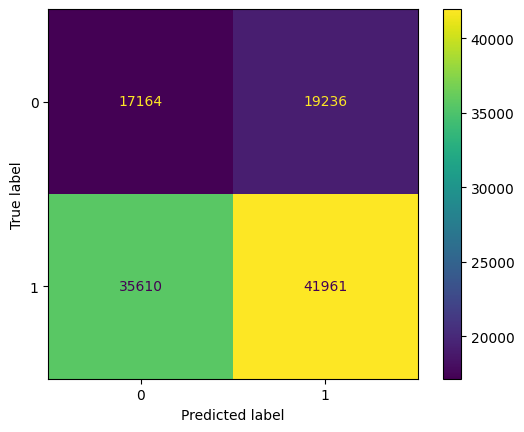

epsilon = 0.01
FPR: [0.12092148 0.08483516]
TPR: [0.91516484 0.87907852]
FNR: [0.08483516 0.12092148]
TNR: [0.87907852 0.91516484]
Accuracy: 0.890603750076774
Precision(micro,macro,weighted): 0.890603750076774,0.8684819934990154,0.9003417493342865
F1(micro,macro,weighted: 0.890603750076774,0.8792993091677881,0.8926430156004226
Recall(micro,macro,weighted: 0.890603750076774,0.8971216783886466,0.890603750076774
FPR: 0.10287832161135328
tpr: 0.8971216783886466
fnr: 0.10287832161135328
tnr: 0.8971216783886466


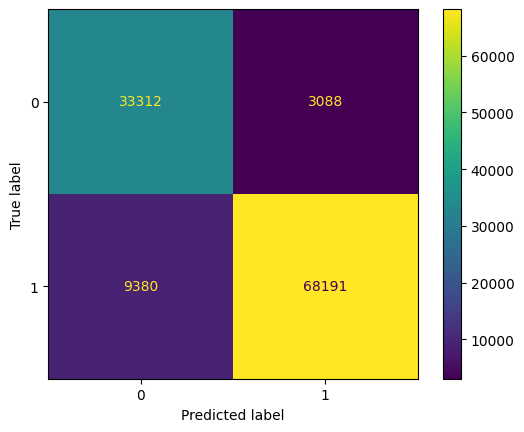

epsilon = 0.1
FPR: [0.24253909 0.17934066]
TPR: [0.82065934 0.75746091]
FNR: [0.17934066 0.24253909]
TNR: [0.75746091 0.82065934]
Accuracy: 0.7776451904431829
Precision(micro,macro,weighted): 0.7776451904431829,0.7567860665570034,0.808523580233604
F1(micro,macro,weighted: 0.7776451904431829,0.7623823740983646,0.7841371053336947
Recall(micro,macro,weighted: 0.7776451904431829,0.7890601237207572,0.7776451904431829
FPR: 0.2109398762792428
tpr: 0.7890601237207572
fnr: 0.2109398762792428
tnr: 0.7890601237207572


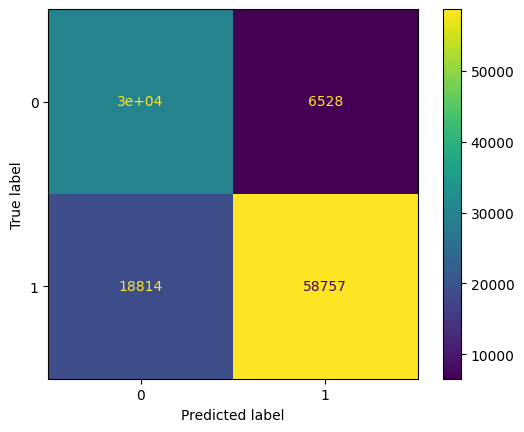

epsilon = 0.2
FPR: [0.42425649 0.29626374]
TPR: [0.70373626 0.57574351]
FNR: [0.29626374 0.42425649]
TNR: [0.57574351 0.70373626]
Accuracy: 0.6166217722052101
Precision(micro,macro,weighted): 0.6166217722052101,0.6215933808679094,0.6880283371327558
F1(micro,macro,weighted: 0.6166217722052101,0.6056089067164733,0.6294162411893944
Recall(micro,macro,weighted: 0.6166217722052101,0.6397398880656799,0.6166217722052101
FPR: 0.36026011193432006
tpr: 0.6397398880656799
fnr: 0.36026011193432006
tnr: 0.6397398880656799


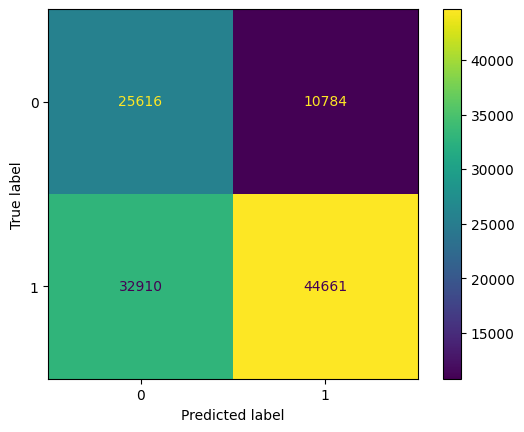

epsilon = 0.3
FPR: [0.45245001 0.54989011]
TPR: [0.45010989 0.54754999]
FNR: [0.54989011 0.45245001]
TNR: [0.54754999 0.45010989]
Accuracy: 0.5164296180607347
Precision(micro,macro,weighted): 0.5164296180607347,0.49897304351120764,0.5642564144603022
F1(micro,macro,weighted: 0.5164296180607347,0.4896875100653648,0.5318875609767246
Recall(micro,macro,weighted: 0.5164296180607347,0.4988299382869519,0.5164296180607347
FPR: 0.5011700617130481
tpr: 0.4988299382869519
fnr: 0.5011700617130481
tnr: 0.4988299382869519


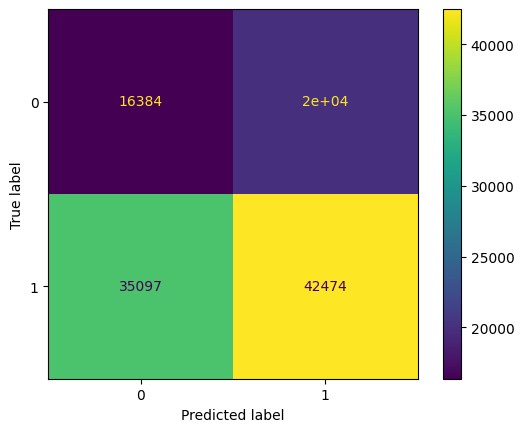

epsilon = 1e-07
FPR: [0.78334687 0.82038462]
TPR: [0.17961538 0.21665313]
FNR: [0.82038462 0.78334687]
TNR: [0.21665313 0.17961538]
Accuracy: 0.20482403418413456
Precision(micro,macro,weighted): 0.20482403418413456,0.22863052728688468,0.2761292977028443
F1(micro,macro,weighted: 0.20482403418413456,0.19831696090173317,0.22440799266154493
Recall(micro,macro,weighted: 0.20482403418413456,0.19813425764783232,0.20482403418413456
FPR: 0.8018657423521677
tpr: 0.19813425764783232
fnr: 0.8018657423521677
tnr: 0.19813425764783232


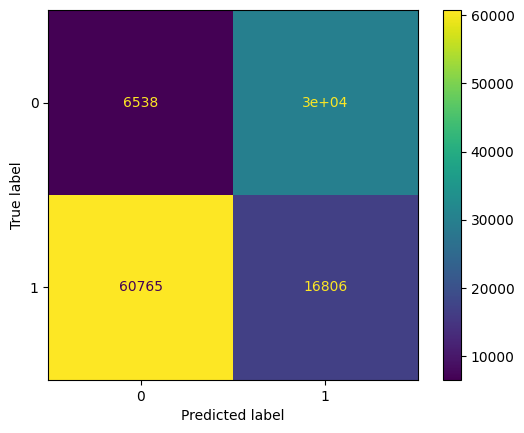

epsilon = 1e-06
FPR: [0.78334687 0.82038462]
TPR: [0.17961538 0.21665313]
FNR: [0.82038462 0.78334687]
TNR: [0.21665313 0.17961538]
Accuracy: 0.20482403418413456
Precision(micro,macro,weighted): 0.20482403418413456,0.22863052728688468,0.2761292977028443
F1(micro,macro,weighted: 0.20482403418413456,0.19831696090173317,0.22440799266154493
Recall(micro,macro,weighted: 0.20482403418413456,0.19813425764783232,0.20482403418413456
FPR: 0.8018657423521677
tpr: 0.19813425764783232
fnr: 0.8018657423521677
tnr: 0.19813425764783232


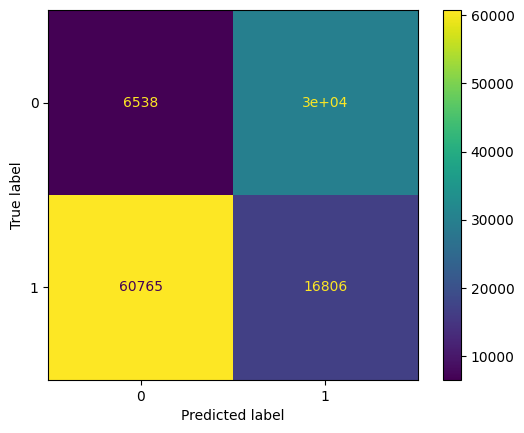

epsilon = 1e-05
FPR: [0.78334687 0.82035714]
TPR: [0.17964286 0.21665313]
FNR: [0.82035714 0.78334687]
TNR: [0.21665313 0.17964286]
Accuracy: 0.20483280834598275
Precision(micro,macro,weighted): 0.20483280834598275,0.22864109297684262,0.2761388342443298
F1(micro,macro,weighted: 0.20483280834598275,0.19832708460465653,0.22441524591313425
Recall(micro,macro,weighted: 0.20483280834598275,0.19814799391156857,0.20483280834598275
FPR: 0.8018520060884314
tpr: 0.19814799391156857
fnr: 0.8018520060884314
tnr: 0.19814799391156857


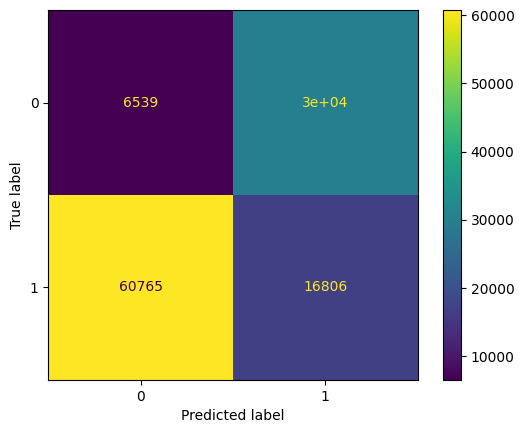

epsilon = 0.0001
FPR: [0.78333398 0.82035714]
TPR: [0.17964286 0.21666602]
FNR: [0.82035714 0.78333398]
TNR: [0.21666602 0.17964286]
Accuracy: 0.20484158250783094
Precision(micro,macro,weighted): 0.20484158250783094,0.2286486703558275,0.2761486274088862
F1(micro,macro,weighted: 0.20484158250783094,0.19833465282663632,0.22442510879707492
Recall(micro,macro,weighted: 0.20484158250783094,0.19815443961937174,0.20484158250783094
FPR: 0.8018455603806283
tpr: 0.19815443961937174
fnr: 0.8018455603806283
tnr: 0.19815443961937174


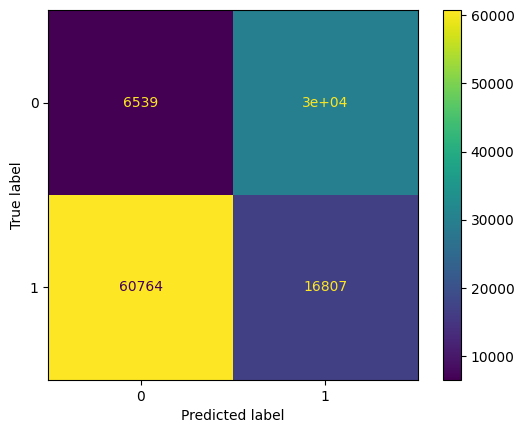

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "DF", epsilon)